<a href="https://colab.research.google.com/github/jaberko/Dossier-de-test/blob/main/Clustering_devices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("smart_classroom_devices_100.csv")

# Combine relevant features for clustering
df["combined_features"] = (
    df["Triggered Events"].fillna("") + " " +
    df["Conflicting Actions"].fillna("") + " " +
    df["Operational Constraints"].fillna("") + " " +
    df["Functional Goals"].fillna("") + " " +
    df["Dependency on Other Devices"].fillna("")
)


In [ ]:
# Convert text features into numerical representation
vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(df["combined_features"])

In [ ]:
# Perform clustering
num_clusters = 5  # Define the number of clusters (adjustable)
clustering_model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
df["Cluster"] = clustering_model.fit_predict(feature_matrix.toarray())

In [ ]:
# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(feature_matrix.toarray())

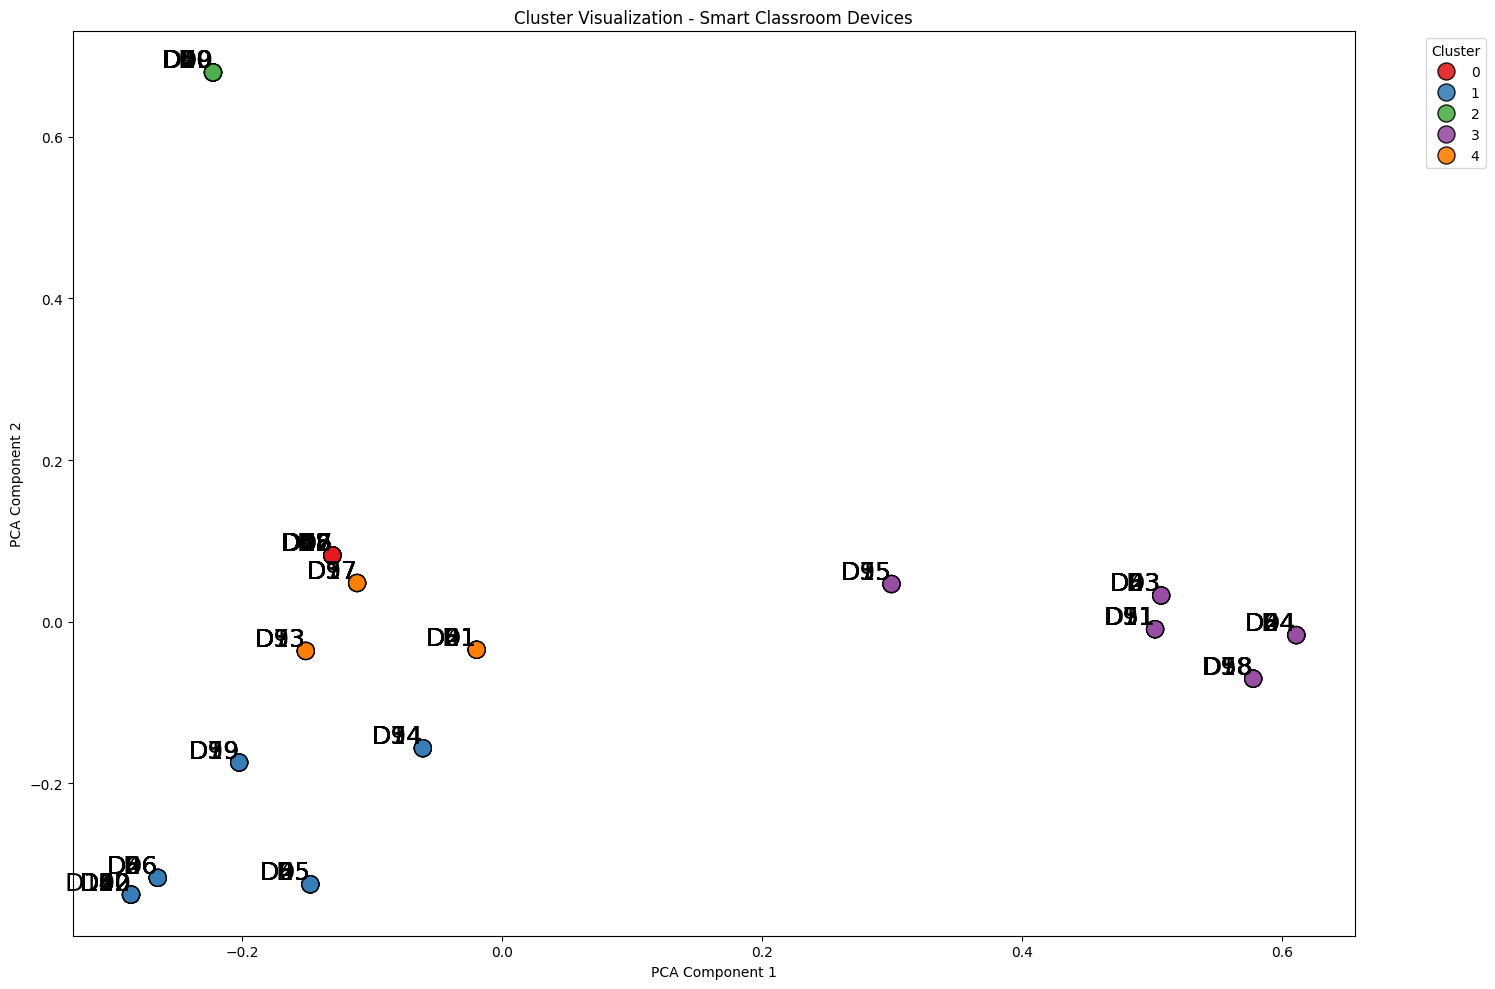

In [ ]:
# Create a scatter plot of the clusters
plt.figure(figsize=(15, 10))  # Increased figure size
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df["Cluster"], palette="Set1", s=150, edgecolor='black',alpha=0.9, legend="full")
for i, row in df.iterrows():
    plt.text(pca_components[i, 0], pca_components[i, 1], row['Device ID'], fontsize=18, ha='right', va='bottom')
plt.title("Cluster Visualization - Smart Classroom Devices")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ensures everything fits within the figure
plt.show()
